## Exercise 1. Linear stability analysis of the deterministic logistic equation.

The equation on which we need to perform analysis is the following:

$$
\frac{dN}{dt} = \mu N (1 - \frac{N}{k})
$$

1) We find the equilibrium points of this equation, these are:
$$
\frac{dN}{dt} = 0 \rightarrow N^* = 0, N^* = k.
$$

2) We take $\delta N = N - N^*$.

Then we can approximate the equation as $\frac{dN}{dt} = f(N^*) + J\delta N$, where $\frac{dN}{dt} = f(N^*) = 0$, so
$\frac{dN}{dt} \approx J\delta N$.

3) Now we can finally analyse two points for stability:

$f(N) = \mu N(1 - \frac{N}{k})$

$f'(N) = \mu - \frac{2\mu N}{k}$

$f'(0) = \mu > 0 \rightarrow \text{unstable point}$

$f'(k) = -\mu < 0 \rightarrow \text{stable point}$.


## Exercise 2. Consumer-resource model for abiotic case

$$
\begin{cases}
\frac{dN}{dt} = N(\gamma c R - d)
\\
\frac{dR}{dt} = - cNR + \mu_{max}\frac{R}{k_s + R}
\end{cases}
$$

The resource changes faster than the species, hence we take quasi-stationary approximation:

$\frac{dR}{dt} = 0 = - cNR + \mu_{max}\frac{R}{k_s + R}$

-- solution 1: trivial, $R^* = 0, \frac{dN}{dt} = - Nd$

-- solution 2: 
$$
\begin{cases}
-cN + \mu_{max}\frac{1}{k_s + R} = 0
\\
\frac{dN}{dt} = N(\gamma c R - d)
\end{cases}
$$

From the first equation we find that $R^* = \frac{\mu_{max}}{cN} - k_s$. If we plug in this into the equation for N, we get:
$\frac{dN}{dt} = \mu_{max}\gamma - (\gamma c k_s + d) N$

The soluton of the homogeneous equation reads: $N(t) = B \exp{(-(\gamma c k_s + d)t)}$, where B is a constant.

To find the solution of initial non homogeneous equation we make $B \rightarrow B(t)$, plug in into the equation and obtain the equation for $B(t)$:
$ B'(t) = \exp{((\gamma k_s c + d)t)} \mu_{max} \gamma$.

After solving this equation we finally can obtain the solution for the non homogeniuos equation:

$N(t) = \frac{\mu_{max}\gamma}{\gamma k_s c + d} + D \exp{(-(\gamma k_s c + d)t)}$, where $D=const$.

With initial condition $N(0) = N_0$ the final solution becomes:

$$
N(t) = \frac{\mu_{max}\gamma}{\gamma k_s c + d} + (N_0 - \frac{\mu_{max}\gamma}{\gamma k_s c + d}) \exp{(-(\gamma k_s c + d)t)}.
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def consumer(mu, gamma, ks, c, d, N0, t):
    #compute the population at time t with given parameters
    A = gamma*ks*c + d
    return mu*gamma/A + (N0 - mu*gamma/A)*np.exp(-A*t)


def resource(mu, gamma, ks, c, d, N0, t):
    #compute resource at time t
    N = consumer(mu, gamma, ks, c, d, N0, t)
    return mu/(c*N) - ks

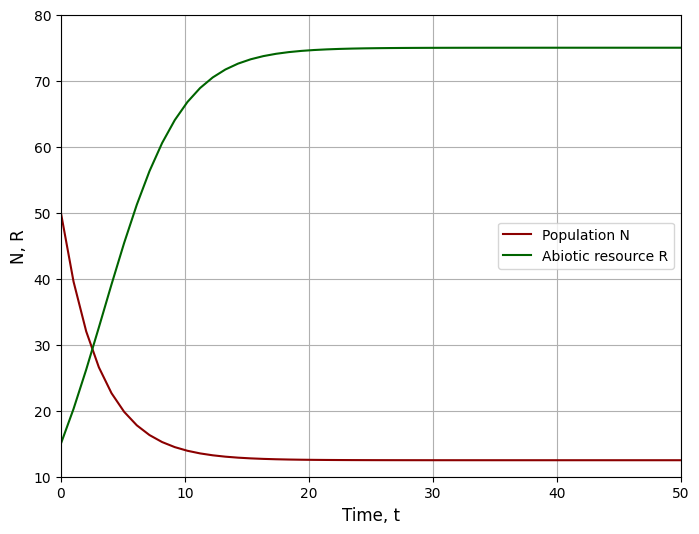

In [3]:
c = 1/500
d = 0.3
ks = 5
gamma = 2
mu = 2
N0 = 50

t = np.linspace(0, 50, 50)
population = consumer(mu, gamma, ks, c, d, N0, t)
resources = resource(mu, gamma, ks, c, d, N0, t)

plt.figure(figsize=(8, 6))
plt.plot(t, population, color='darkred')
plt.plot(t, resources, color='darkgreen')
plt.xlabel('Time, t', fontsize=12)
plt.ylabel('N, R', fontsize=12)
plt.xlim(0, 50)
plt.ylim(10, 80)
plt.legend(['Population N', 'Abiotic resource R'])
plt.grid()

## Exercise 3. Simulation of the stochastic logistic model.

The equation for the stochastic logistic growth with environmental noise is:

$$
\dot{x} =  \frac{x}{\tau}(1 - \frac{x}{K}) + \sqrt{\frac{\sigma}{\tau}}x\xi(t),
$$


where $\xi \sim \sigma \sqrt{dt} N(0,1)$. 

Stationary solution of the equation with imposed reflective boundary condition should be a gamma distribution of x:

The associated Fokker Planck equation is then:

$$
\frac{\partial P(x)}{\partial t} = - \frac{\partial}{\partial x}\left( \frac{x}{\tau}(1 - \frac{x}{K})P(x)\right) + \frac{1}{2}\frac{\partial^2}{\partial x^2}\left(\frac{\sigma x^2 P(x)}{\tau}\right)
$$

After setting $\frac{\partial P(x)}{\partial t} = 0$, we obtain:

$\frac{dP}{P} = dx \frac{2}{\sigma}(\frac{1-\sigma}{x} - \frac{1}{K})$.

It is possible to show that the solution of this equation is:

$$
P(x) = \frac{1}{-\beta^{-\alpha - 1} \Gamma(\alpha+1, \beta x)} \dot \exp\left( \alpha x - \beta x\right),
$$

where $\alpha = \frac{2}{\sigma}(1-\sigma), \beta = \frac{1}{K}$.

In [4]:
def langevin(b0, tau, K, sigma, time):
    N = int(time/dt)
    t = np.linspace(0, time, N)
    x = np.zeros(N)
    x[0] = b0
    for i in range(1, N):
        ksi = sigma*np.sqrt(dt)*np.random.normal(0,1,1)
        dx = x[i-1]/tau*(1-x[i-1]/K)+ np.sqrt(sigma/tau)*x[i-1]*ksi
        x[i] = x[i-1] + dx
        
    return x, t

(0.0, 50.0)

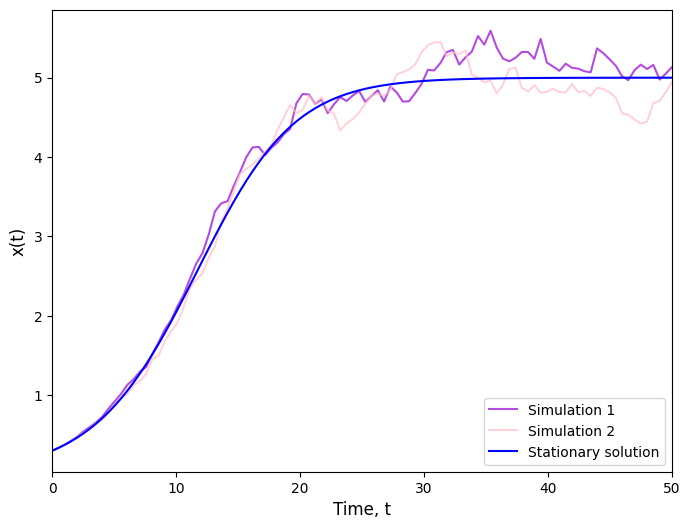

In [5]:
K = 5
tau = 8
sigma = 0.2
dt = 0.5
time = 50
b0 = 0.3


x1, t1 = langevin(b0, tau, K, sigma, time)
x2, t2 = langevin(b0, tau, K, sigma, time)

x_stat, t_stat = langevin(b0, tau, K, 0, time) #stationary, sigma = 0


plt.figure(figsize =(8,6))
plt.plot(t1, x1, color='darkviolet', alpha=0.7)
plt.plot(t2, x2, color='pink', alpha=0.7)
plt.plot(t_stat, x_stat, color='blue')
plt.legend(['Simulation 1', 'Simulation 2', 'Stationary solution'], loc='lower right')
plt.xlabel('Time, t', fontsize=12)
plt.ylabel('x(t)', fontsize=12)
plt.xlim(0, time)